Tugas


1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
   - Jumlah cluster yang terbentuk.
   - Banyaknya noise.
   - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

**JAWAB**

Langkah 1 — Import Library dan Load Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan
from sklearn.metrics import adjusted_rand_score

data = pd.read_csv("D:\File untuk kuliah\Semester-5\Pembelajaran Mesin\Praktek\MachineLearning_Smst5_2025\Week6_JS06\Assets\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Preprocessing (mengambil fitur numerik & normalisasi)

In [12]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Clustering dengan HDBSCAN

In [13]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = clusterer.fit_predict(X_scaled)

data['Cluster'] = cluster_labels

print(data[['Species', 'Cluster']].head(10))

       Species  Cluster
0  Iris-setosa        1
1  Iris-setosa        1
2  Iris-setosa        1
3  Iris-setosa        1
4  Iris-setosa        1
5  Iris-setosa        1
6  Iris-setosa        1
7  Iris-setosa        1
8  Iris-setosa        1
9  Iris-setosa        1


c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ecg39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Laporkan hasil

In [14]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

n_noise = list(cluster_labels).count(-1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya data noise: {n_noise}")


Jumlah cluster yang terbentuk: 2
Banyaknya data noise: 2


Visualisasi dengan PCA

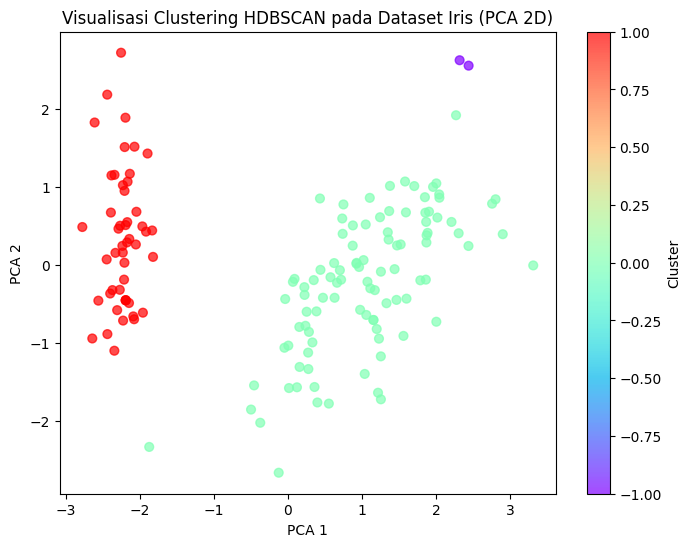

In [15]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1],
            c=cluster_labels, cmap='rainbow', s=40, alpha=0.7)
plt.title("Visualisasi Clustering HDBSCAN pada Dataset Iris (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

Analisis kesesuaian dengan label asli

In [16]:
ari = adjusted_rand_score(data['Species'].astype('category').cat.codes, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.5394
